In [1]:
#import some of the necessary libraries and packages to start
#load the csv file and rename
#use info command to get basic info on the loaded dataset

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats

filename='medical_clean.csv'
mrd=pd.read_csv(filename)
mrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [2]:
#check for duplicate values
#check for null values

mrd.duplicated()
print(mrd.duplicated().value_counts())

mrd.isnull().sum()

False    10000
Name: count, dtype: int64


CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [3]:
#no duplicates or nulls exist
#now to identify outliers present in the dataset
#will do this using zscores for continuous variables

mrd['zscore_Children']=stats.zscore(mrd['Children'])
sum(mrd.zscore_Children>3)

202

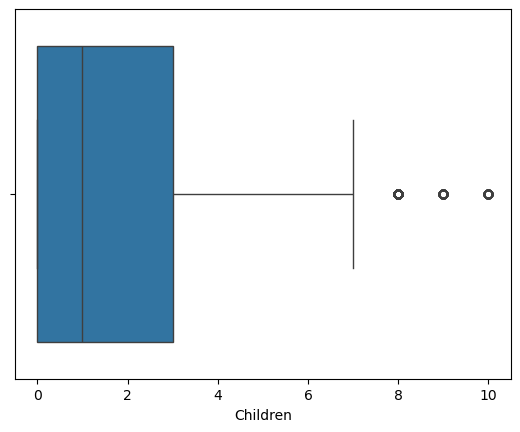

In [4]:
#outliers are present, will visualize using boxplots

C_out=sb.boxplot(x='Children', data=mrd)

In [5]:
#repeat process for continuous variables

mrd['zscore_Age']=stats.zscore(mrd['Age'])
sum((mrd.zscore_Age<-3) | (mrd.zscore_Age>3))

0

In [6]:
#no outliers present for this variable, onto the next

mrd['zscore_Income']=stats.zscore(mrd['Income'])
sum((mrd.zscore_Income<-3) | (mrd.zscore_Income>3))

143

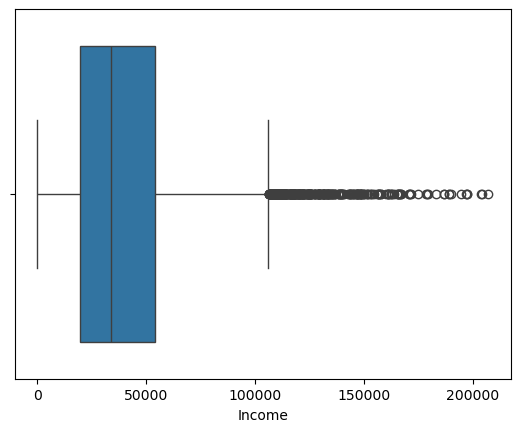

In [7]:
C_out=sb.boxplot(x='Income', data=mrd)

In [8]:
mrd['zscore_VitD_levels']=stats.zscore(mrd['VitD_levels'])
sum((mrd.zscore_VitD_levels<-3) | (mrd.zscore_VitD_levels>3))

24

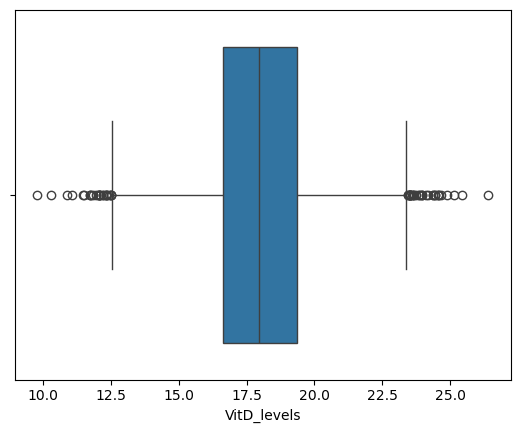

In [9]:
C_out=sb.boxplot(x='VitD_levels', data = mrd)

In [10]:
mrd['zscore_Doc_visits']=stats.zscore(mrd['Doc_visits'])
sum((mrd.zscore_Doc_visits<-3) | (mrd.zscore_Doc_visits>3))

8

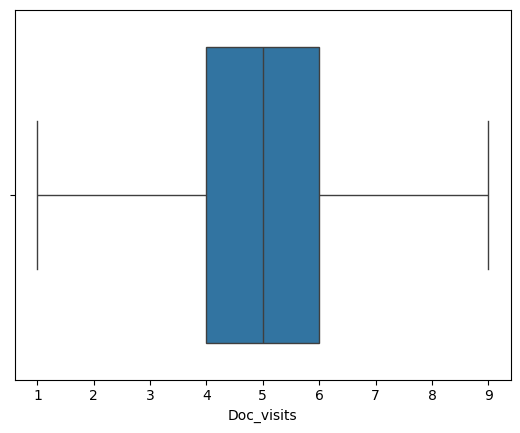

In [11]:
C_out=sb.boxplot(x='Doc_visits', data=mrd)

In [12]:
mrd['zscore_Full_meals_eaten']=stats.zscore(mrd['Full_meals_eaten'])
sum((mrd.zscore_Full_meals_eaten<-3) | (mrd.zscore_Full_meals_eaten>3))

33

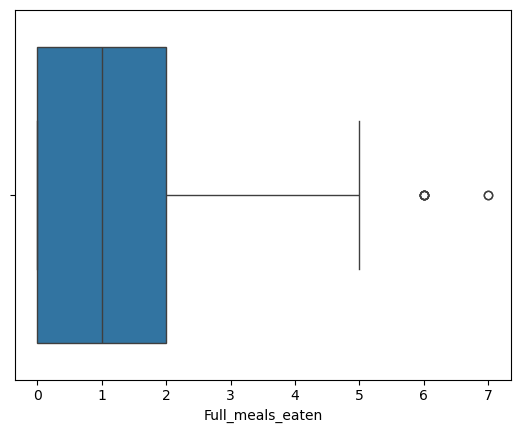

In [13]:
C_out=sb.boxplot(x='Full_meals_eaten', data=mrd)

In [14]:
mrd['zscore_vitD_supp']=stats.zscore(mrd['vitD_supp'])
sum((mrd.zscore_vitD_supp<-3) | (mrd.zscore_vitD_supp>3))

70

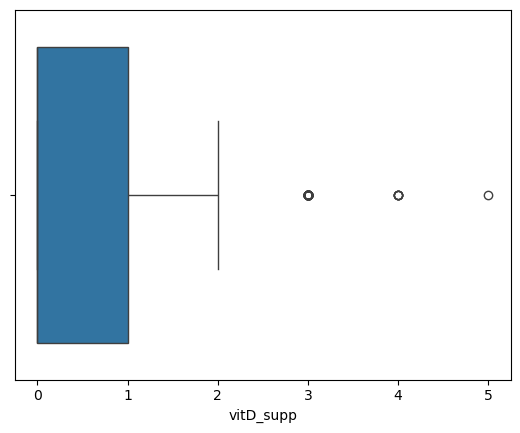

In [15]:
C_out=sb.boxplot(x='vitD_supp', data=mrd)

In [16]:
mrd['zscore_Initial_days']=stats.zscore(mrd['Initial_days'])
sum((mrd.zscore_Initial_days<-3) | (mrd.zscore_Initial_days>3))

0

In [17]:
#outliers are present and will be retained as they are 'expected'
#locating all continuous variables in the dataset
#checking collinearity for continuous variables to be examined

cont_vars=['Age', 'Income', 'Children', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge']
mrd_cont=mrd[cont_vars]

mrd_cont.corr()

,Age,Income,Children,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge
Age,1.000000,-0.012228,0.009836,0.010315,0.006898,0.008555,0.010014,0.016264,0.016876
Income,-0.012228,1.000000,0.007176,-0.013115,0.013464,-0.011365,0.001253,-0.012465,-0.014345
Children,0.009836,0.007176,1.000000,0.009487,-0.002292,0.003835,-0.004319,0.022467,0.024100
VitD_levels,0.010315,-0.013115,0.009487,1.000000,0.010210,0.023223,-0.007203,-0.003642,-0.001403
Doc_visits,0.006898,0.013464,-0.002292,0.010210,1.000000,-0.002767,0.005681,-0.006754,-0.005043
Full_meals_eaten,0.008555,-0.011365,0.003835,0.023223,-0.002767,1.000000,-0.019980,-0.017267,-0.014306
vitD_supp,0.010014,0.001253,-0.004319,-0.007203,0.005681,-0.019980,1.000000,0.015974,0.016924
Initial_days,0.016264,-0.012465,0.022467,-0.003642,-0.006754,-0.017267,0.015974,1.000000,0.987640
TotalCharge,0.016876,-0.014345,0.024100,-0.001403,-0.005043,-0.014306,0.016924,0.987640,1.000000


In [18]:
#now we re-express categorical variables using boolean mapping

bool_mapping = {"Yes":1, "No":0}
mrd["HighBlood"]=mrd["HighBlood"].map(bool_mapping)

In [19]:
#repeat process for categorical variables

mrd["Stroke"]=mrd["Stroke"].map(bool_mapping)
mrd["Overweight"]=mrd["Overweight"].map(bool_mapping)
mrd["Arthritis"]=mrd["Arthritis"].map(bool_mapping)
mrd["Diabetes"]=mrd["Diabetes"].map(bool_mapping)
mrd["Hyperlipidemia"]=mrd["Hyperlipidemia"].map(bool_mapping)
mrd["BackPain"]=mrd["BackPain"].map(bool_mapping)
mrd["Anxiety"]=mrd["Anxiety"].map(bool_mapping)
mrd["Allergic_rhinitis"]=mrd["Allergic_rhinitis"].map(bool_mapping)
mrd["Reflux_esophagitis"]=mrd["Reflux_esophagitis"].map(bool_mapping)
mrd["Asthma"]=mrd["Asthma"].map(bool_mapping)

In [20]:
#checking collinearity as well for categorical variables
#converting categorical variables to type 'float'

mrd['HighBlood']=mrd['HighBlood'].astype(float)
mrd["Overweight"]=mrd["Overweight"].astype(float)
mrd["Arthritis"]=mrd["Arthritis"].astype(float)
mrd["Diabetes"]=mrd["Diabetes"].astype(float)
mrd["Hyperlipidemia"]=mrd["Hyperlipidemia"].astype(float)
mrd["BackPain"]=mrd["BackPain"].astype(float)
mrd["Anxiety"]=mrd["Anxiety"].astype(float)
mrd["Allergic_rhinitis"]=mrd["Allergic_rhinitis"].astype(float)
mrd["Reflux_esophagitis"]=mrd["Reflux_esophagitis"].astype(float)
mrd["Asthma"]=mrd["Asthma"].astype(float)

cat_vars = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']
mrd_cat=mrd[cat_vars]

mrd_cat.corr()

,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma
HighBlood,1.000000,0.007568,0.026231,0.007314,-0.005858,-0.009529,0.003048,0.008303,0.011709,0.001150,0.006174
Stroke,0.007568,1.000000,-0.001011,-0.018438,0.005792,-0.014847,0.003602,-0.013801,-0.004837,-0.000054,0.002443
Overweight,0.026231,-0.001011,1.000000,0.003954,-0.007575,-0.006102,0.010083,-0.011186,0.002819,-0.012240,0.013943
Arthritis,0.007314,-0.018438,0.003954,1.000000,0.009097,-0.007130,-0.018804,0.012045,0.008748,0.014894,-0.006423
Diabetes,-0.005858,0.005792,-0.007575,0.009097,1.000000,0.011739,-0.013405,-0.002529,0.005486,-0.007816,0.016765
Hyperlipidemia,-0.009529,-0.014847,-0.006102,-0.007130,0.011739,1.000000,-0.000963,-0.013178,-0.009049,0.001580,-0.009106
BackPain,0.003048,0.003602,0.010083,-0.018804,-0.013405,-0.000963,1.000000,0.009289,0.004023,0.016036,0.014261
Anxiety,0.008303,-0.013801,-0.011186,0.012045,-0.002529,-0.013178,0.009289,1.000000,0.004368,-0.007566,0.011758
Allergic_rhinitis,0.011709,-0.004837,0.002819,0.008748,0.005486,-0.009049,0.004023,0.004368,1.000000,-0.007731,0.004454
Reflux_esophagitis,0.001150,-0.000054,-0.012240,0.014894,-0.007816,0.001580,0.016036,-0.007566,-0.007731,1.000000,-0.001458


In [21]:
#get summary statistics for dependent variable, TotalCharge

mrd['TotalCharge'].describe()

count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

In [22]:
#repeat this step for all variables being used (using value_counts for categorical variables)

mrd['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [23]:
mrd['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [24]:
mrd['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

In [25]:
mrd['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

In [26]:
mrd['Doc_visits'].describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [27]:
mrd['Full_meals_eaten'].describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [28]:
mrd['vitD_supp'].describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

In [29]:
mrd['Initial_days'].describe()

count    10000.000000
mean        34.455299
std         26.309341
min          1.001981
25%          7.896215
50%         35.836244
75%         61.161020
max         71.981490
Name: Initial_days, dtype: float64

In [30]:
mrd['HighBlood'].value_counts()

HighBlood
0.0    5910
1.0    4090
Name: count, dtype: int64

In [31]:
mrd['Stroke'].value_counts()

Stroke
0    8007
1    1993
Name: count, dtype: int64

In [32]:
mrd['Overweight'].value_counts()

Overweight
1.0    7094
0.0    2906
Name: count, dtype: int64

In [33]:
mrd['Arthritis'].value_counts()

Arthritis
0.0    6426
1.0    3574
Name: count, dtype: int64

In [34]:
mrd['Diabetes'].value_counts()

Diabetes
0.0    7262
1.0    2738
Name: count, dtype: int64

In [35]:
mrd['Hyperlipidemia'].value_counts()

Hyperlipidemia
0.0    6628
1.0    3372
Name: count, dtype: int64

In [36]:
mrd['BackPain'].value_counts()

BackPain
0.0    5886
1.0    4114
Name: count, dtype: int64

In [37]:
mrd['Anxiety'].value_counts()

Anxiety
0.0    6785
1.0    3215
Name: count, dtype: int64

In [38]:
mrd['Allergic_rhinitis'].value_counts()

Allergic_rhinitis
0.0    6059
1.0    3941
Name: count, dtype: int64

In [39]:
mrd['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
0.0    5865
1.0    4135
Name: count, dtype: int64

In [40]:
mrd['Asthma'].value_counts()

Asthma
0.0    7107
1.0    2893
Name: count, dtype: int64

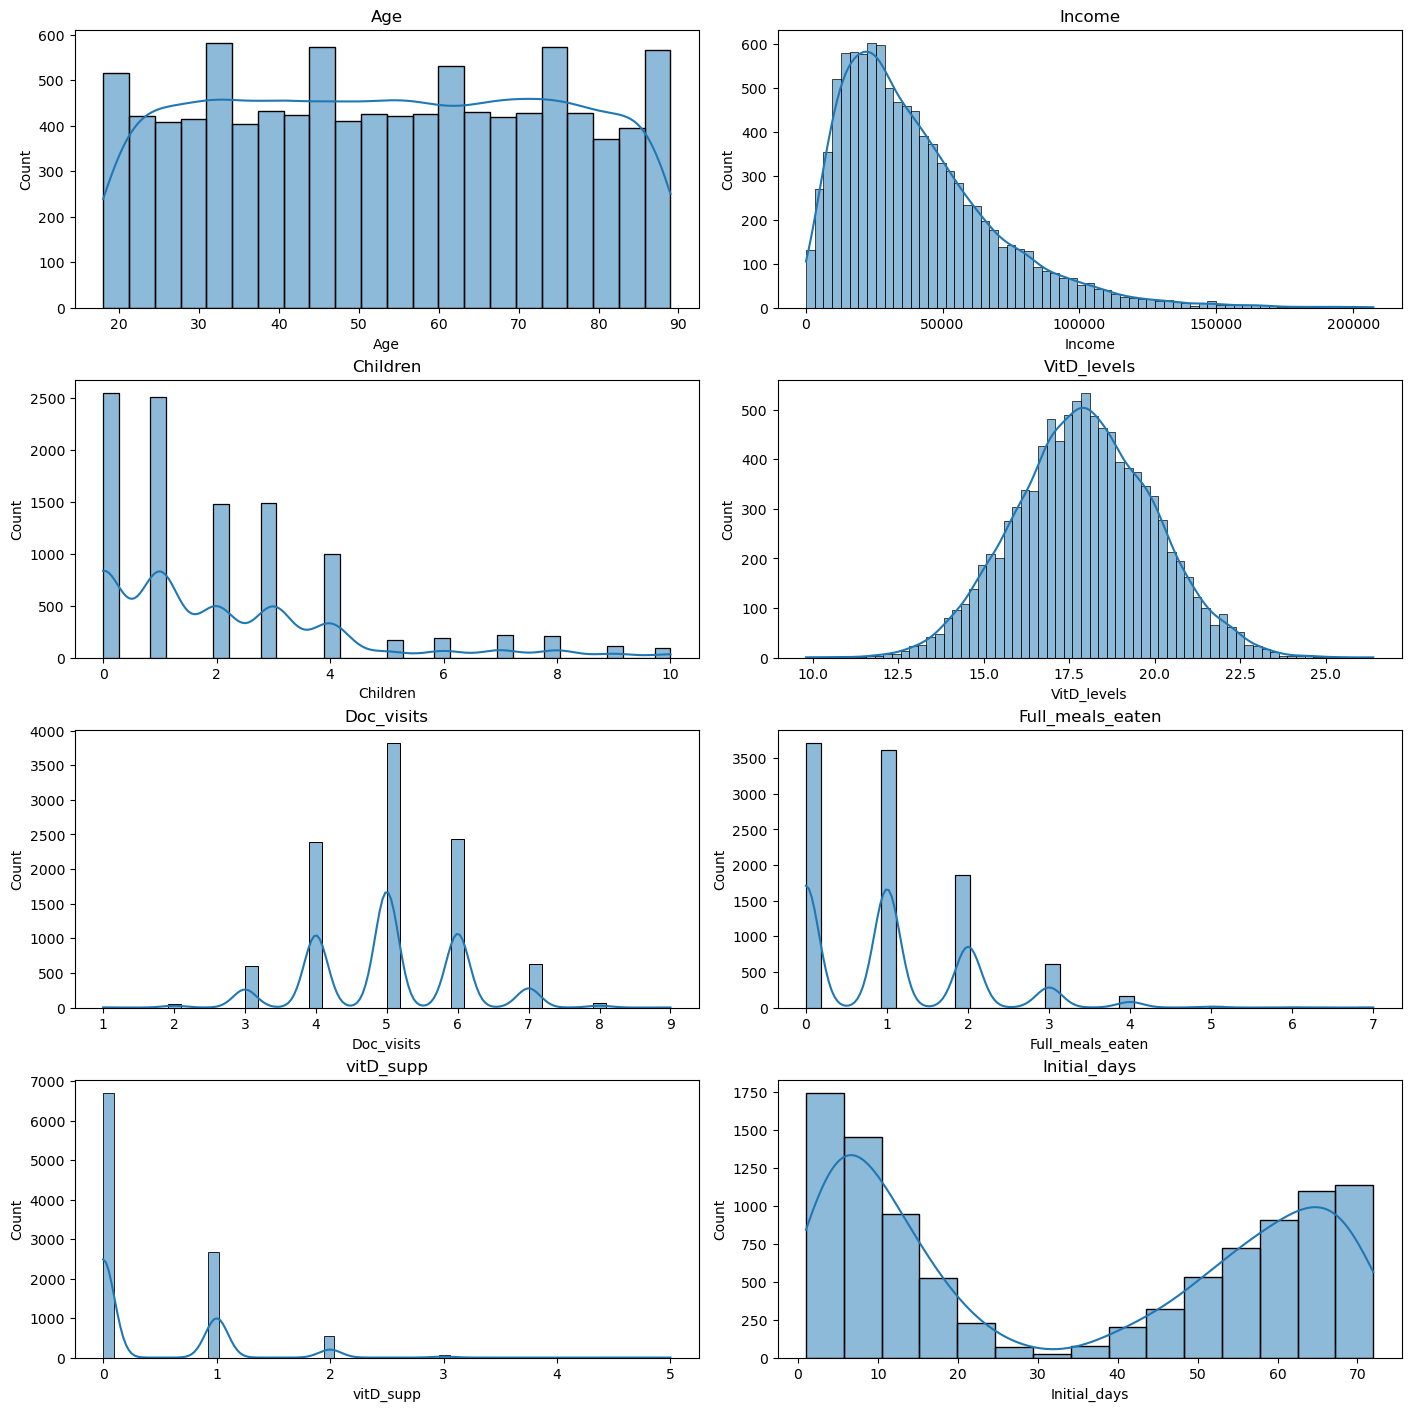

In [41]:
#creating all univariate visualizations together instead of one at a time
#first for the continuous variables

fig, axes=plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14,14), constrained_layout=True)

for col, ax in zip(mrd_cont.columns, axes.flat):
    sb.histplot(mrd_cont[col], ax=ax, kde=True)
    ax.set_title(col)

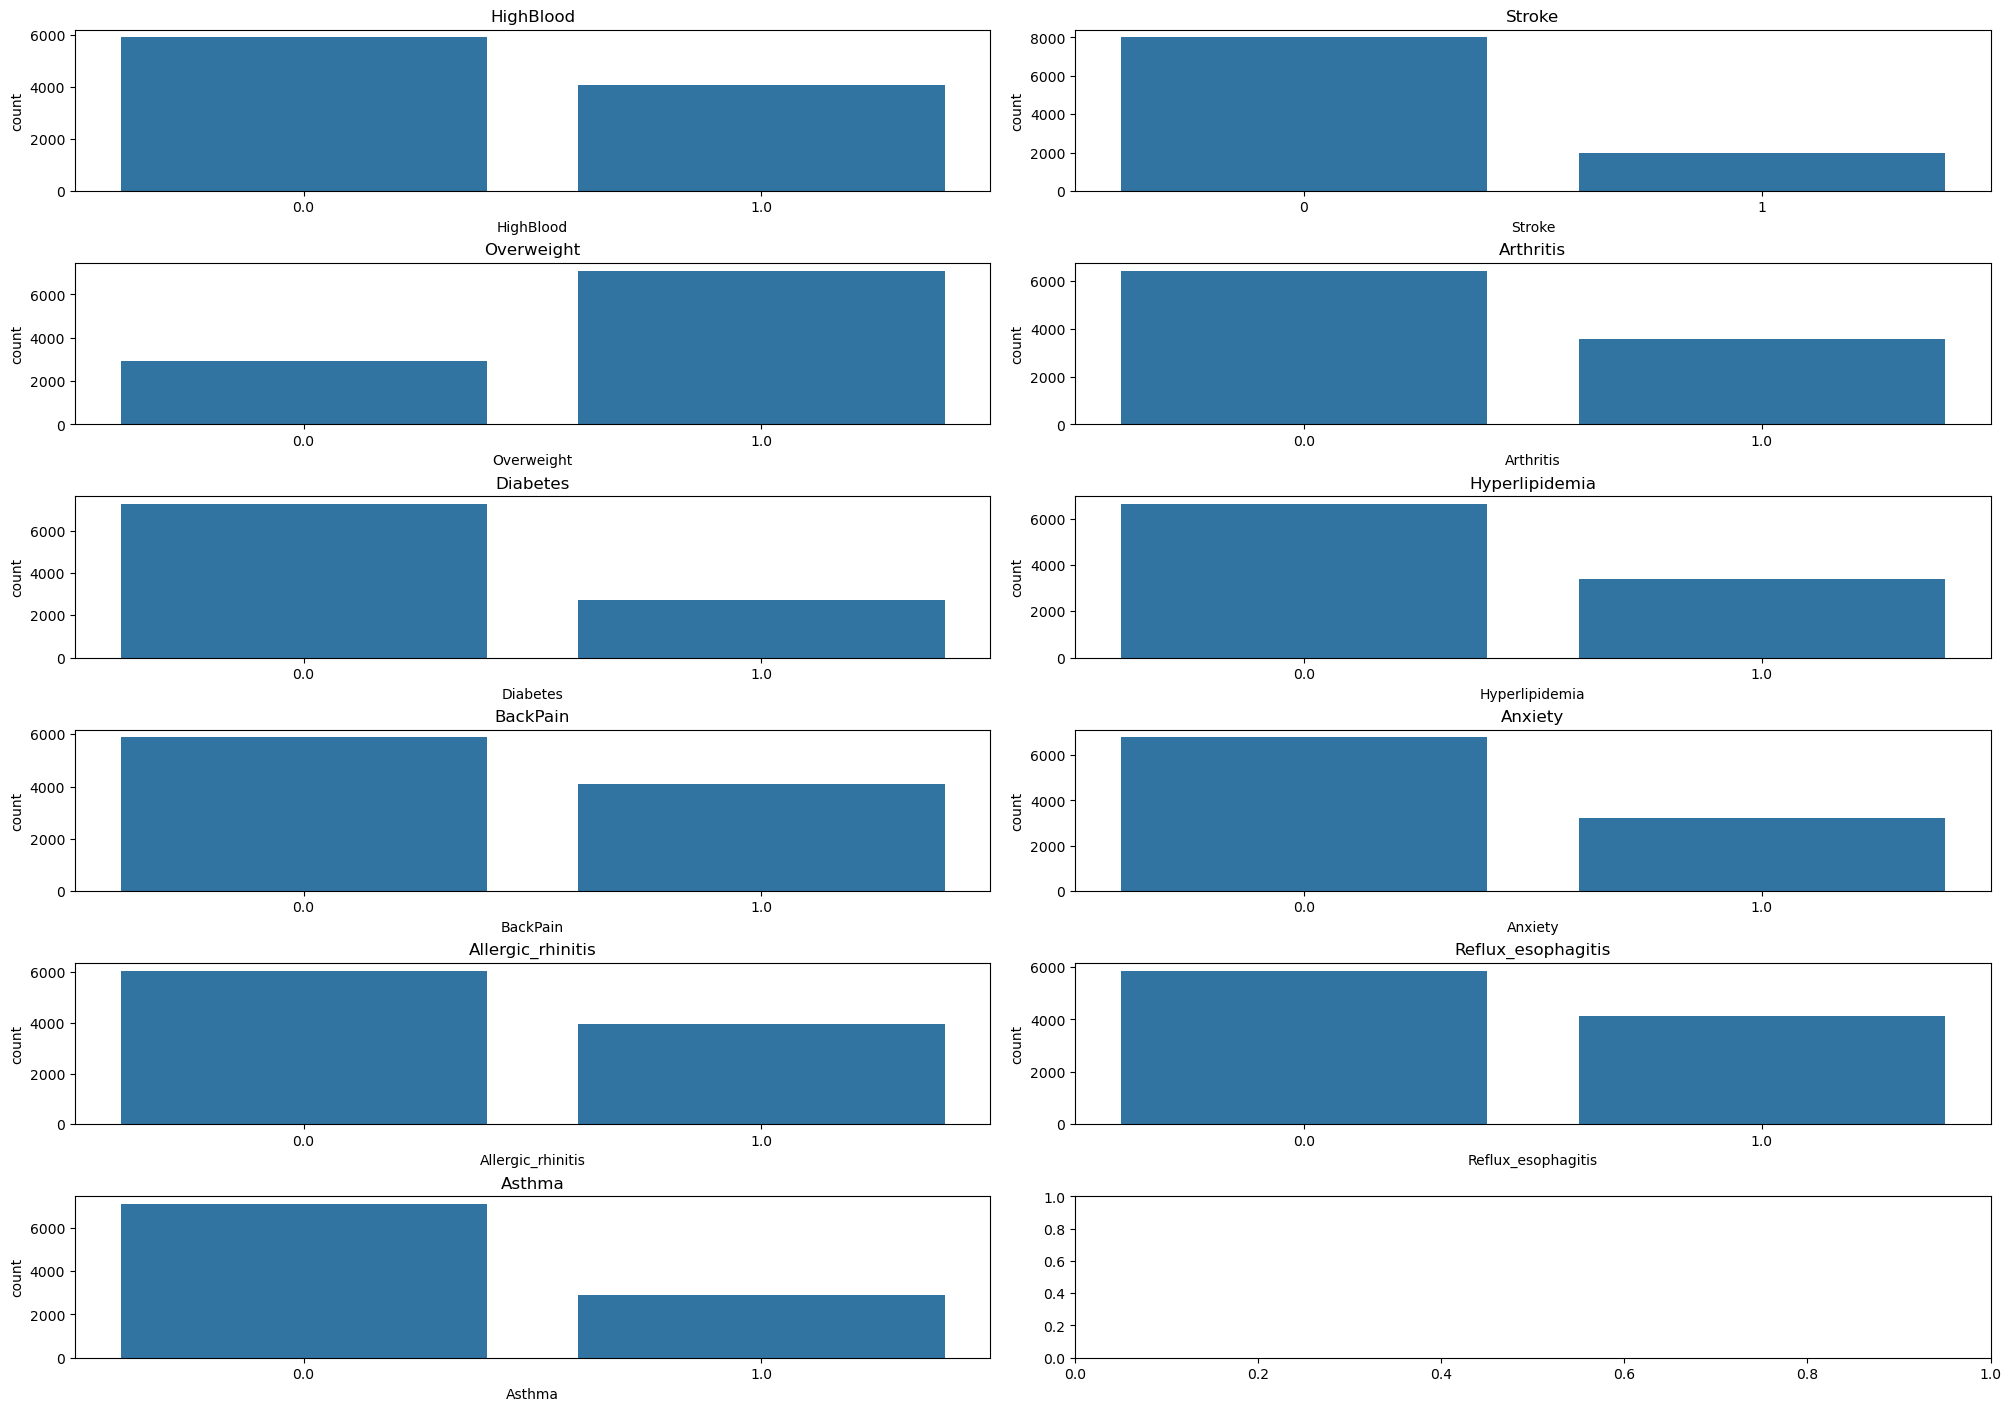

In [42]:
#now onto the categorical variables
#this will be done in largely the same manner

fig, axes=plt.subplots(6, 2, sharex=False, sharey=False, figsize=(20,14), constrained_layout=True)

for col, ax in zip(mrd_cat.columns, axes.flat):
    sb.countplot(data=mrd_cat, x=col, ax=ax)
    ax.set_title(col)

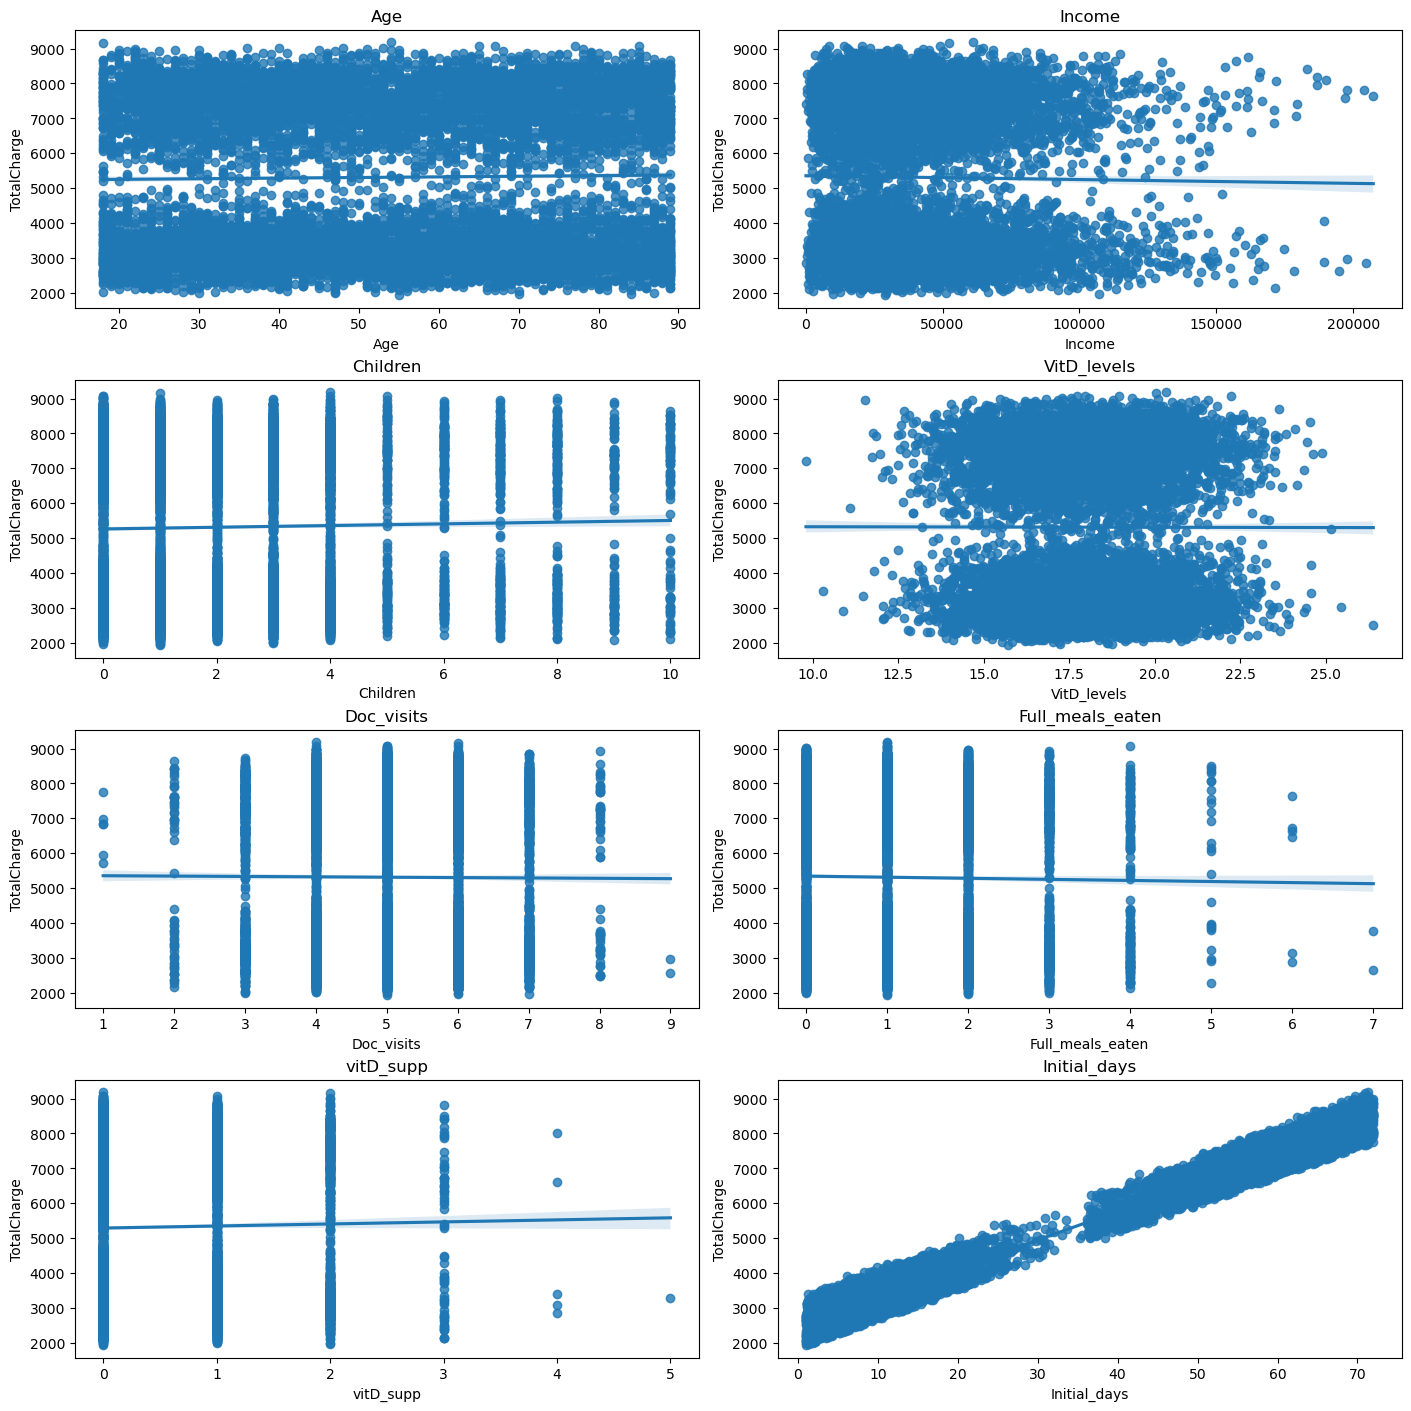

In [43]:
#onto the bivariate visualizations
#starting with the continuous variables
#using the same process as above, except plotting against the dependent variable TotalCharge

fig, axes=plt.subplots(4, 2, sharex=False, sharey=False, figsize=(14,14), constrained_layout=True)

for col, ax in zip(mrd_cont.columns, axes.flat):
    sb.regplot(x=mrd_cont[col], y=mrd['TotalCharge'], ax=ax)
    ax.set_title(col)

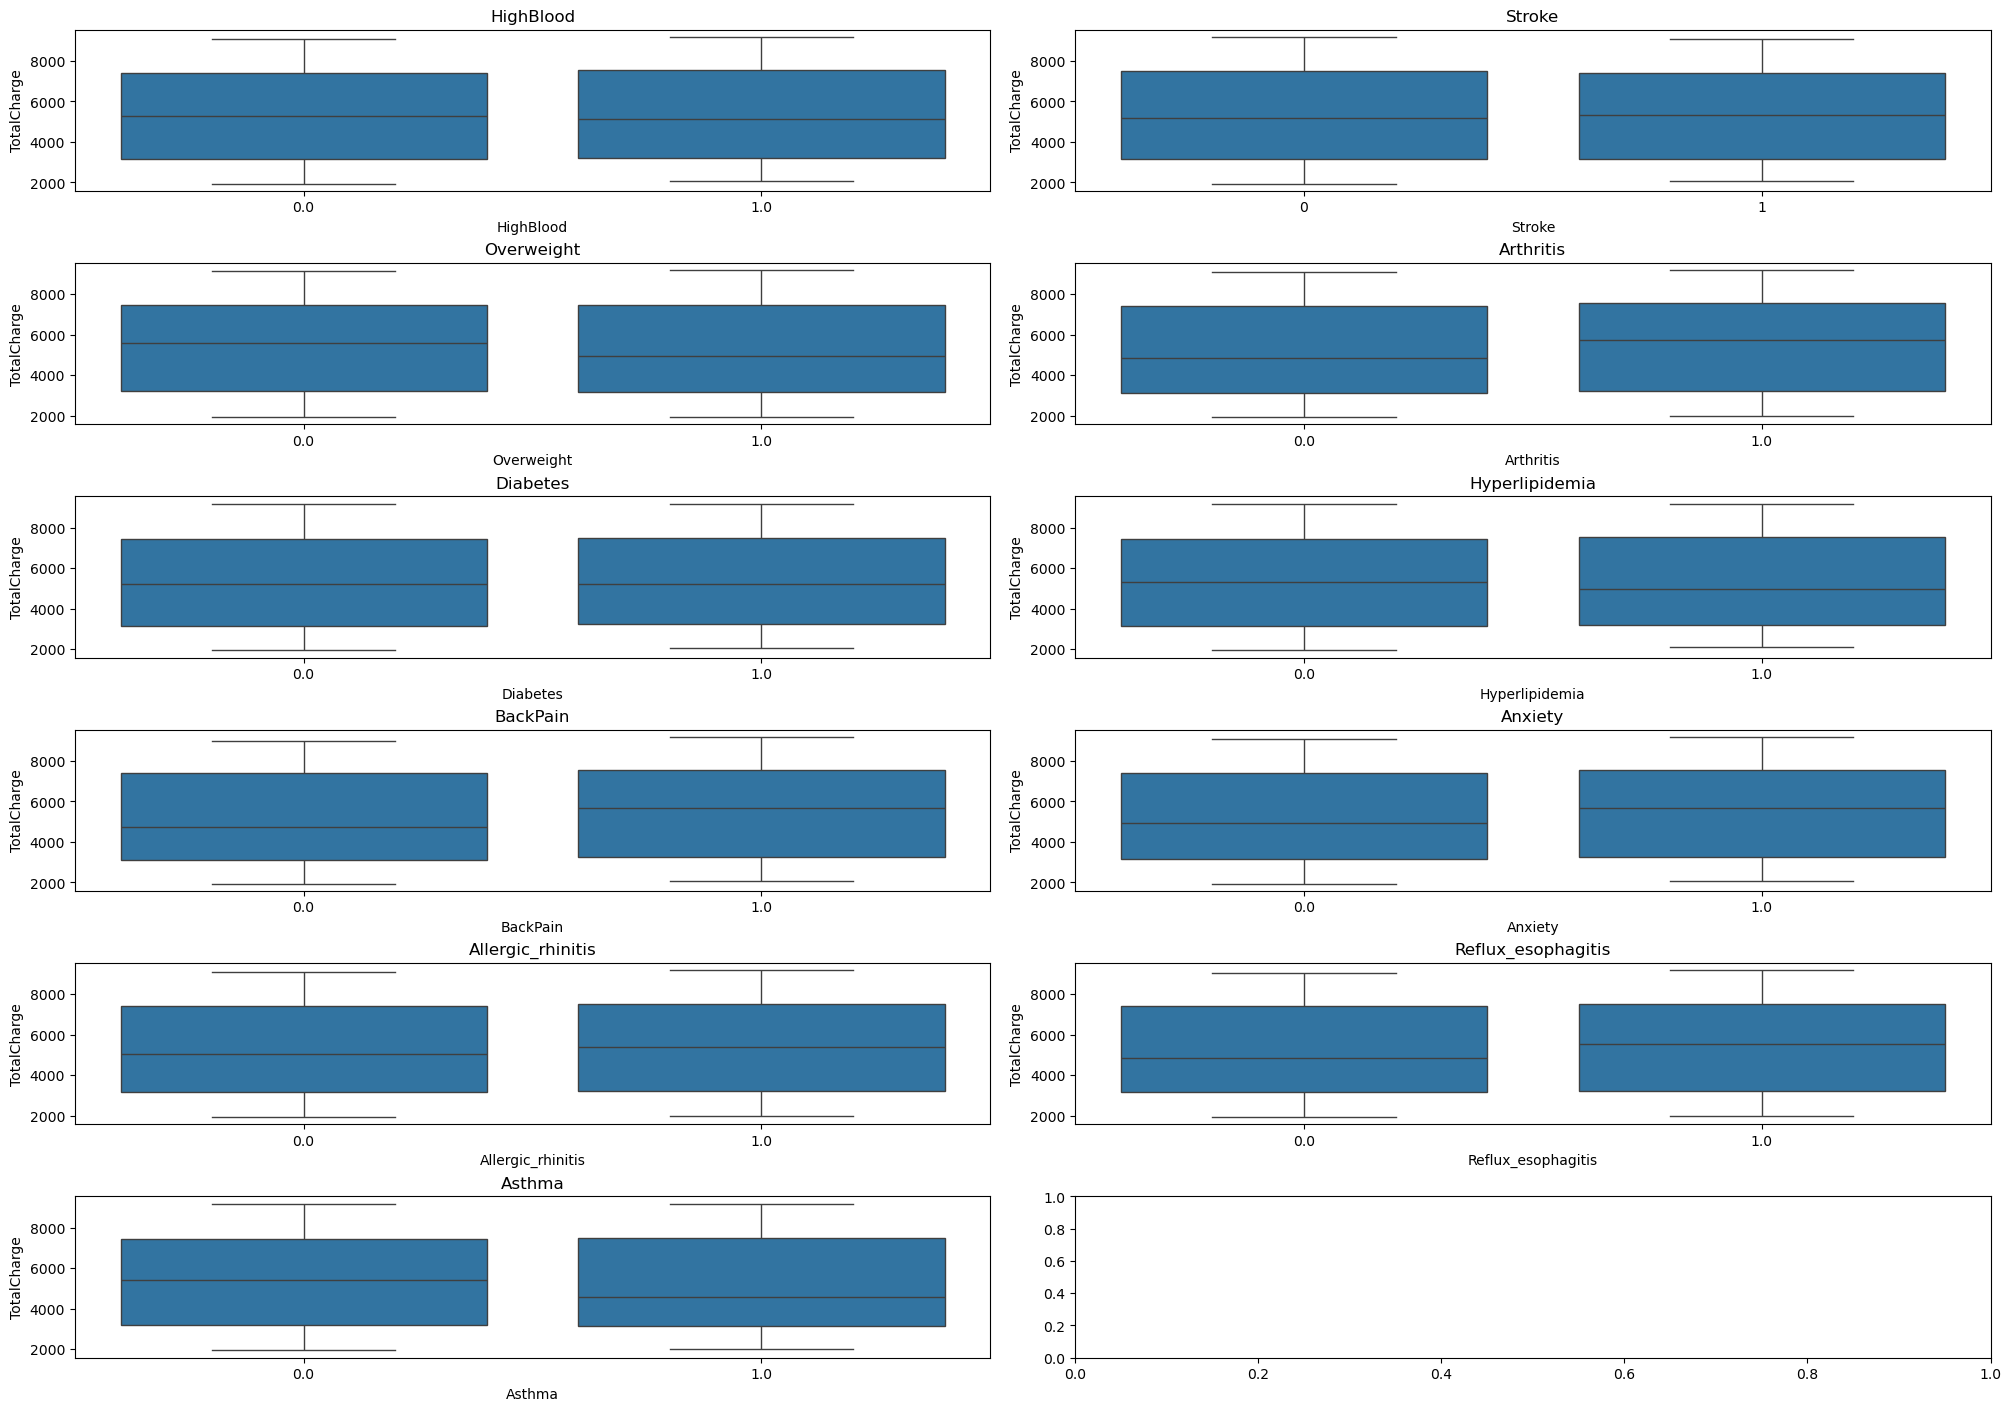

In [44]:
#now for the categorical variables
#again plotted against the dependent variable TotalCharge

fig, axes=plt.subplots(6, 2, sharex=False, sharey=False, figsize=(20, 14), constrained_layout=True)
for col, ax in zip(mrd_cat.columns, axes.flat):
    sb.boxplot(x=mrd_cat[col], y=mrd['TotalCharge'], ax=ax)
    ax.set_title(col)

In [45]:
#dropping columns not necessary for our purposes
#also dropping z score columns created earlier
#sending prepared dataset to its own csv file, which is attached

mrd=mrd.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink', 'Initial_admin', 'Complication_risk', 'Services', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])
mrd=mrd.drop(columns=['zscore_Children', 'zscore_Age', 'zscore_Income', 'zscore_VitD_levels', 'zscore_Doc_visits', 'zscore_Full_meals_eaten', 'zscore_vitD_supp', 'zscore_Initial_days'])

mrd.to_csv('Medical_clean1.csv')

In [46]:
#import statsmodels to run regression model
#set dependent and independent variables for the model

import statsmodels.api as sm

y=mrd['TotalCharge']
x=mrd[['Age', 'Income', 'Children', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,x)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.353e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:49   Log-Likelihood:                -71941.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9980   BIC:                         1.441e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Age                   -0.0123      0.156     -0.079      0.937      -0.319       0.294
Income                -0.0002      0.000     -1.606      0.108      -0.000    4.01e-05
Children               1.6995      1.492      1.139      0.255      -1.226       4.625
VitD_levels            3.1367      1.601      1.959      0.050      -0.001       6.275
Doc_visits             3.5788      3.087      1.159      0.246      -2.473       9.631
Full_meals_eaten       4.0701      3.203      1.271      0.204      -2.209      10.350
vitD_supp              3.9466      5.137      0.768      0.442      -6.123      14.016
Initial_days          81.7819      0.123    666.175      0.000      81.541      82.023
HighBlood            115.0660      6.565     17.527      0.000     102.197     127.935
Stroke                -6.1594      8.078     -0.762      0.446     -21.994       9.675
Overweight           -10.6581      7.112     -1.499      0.134     -24.599       3.282
Arthritis             62.9726      6.737      9.347      0.000      49.767      76.178
Diabetes              68.4798      7.243      9.455      0.000      54.283      82.677
Hyperlipidemia       101.9155      6.829     14.924      0.000      88.530     115.301
BackPain              83.1614      6.562     12.673      0.000      70.298      96.025
Anxiety               89.5653      6.910     12.962      0.000      76.020     103.110
Allergic_rhinitis     66.8769      6.604     10.126      0.000      53.931      79.823
Reflux_esophagitis    62.2626      6.555      9.498      0.000      49.413      75.112
Asthma                -7.4736      7.121     -1.050      0.294     -21.431       6.484
const               2192.0247     35.666     61.460      0.000    2122.112    2261.937
==============================================================================
Omnibus:                     2367.666   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              454.745
Skew:                           0.144   Prob(JB):                     1.79e-99
Kurtosis:                       1.996   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
#due to multicollinearity issues, utilize VIF to identify which variables to drop
#import VIF
#will eliminate variables whose VIF > 5, one at a time

from statsmodels.stats.outliers_influence import variance_inflation_factor

X=mrd[['Age', 'Income', 'Children', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_mrd = pd.DataFrame()
vif_mrd["feature"] = X.columns

vif_mrd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_mrd)

               feature        VIF
0                  Age   7.371062
1               Income   2.963730
2             Children   1.932577
3          VitD_levels  28.910693
4           Doc_visits  19.735971
5     Full_meals_eaten   1.981567
6            vitD_supp   1.400641
7         Initial_days   2.684083
8            HighBlood   1.688726
9               Stroke   1.248406
10          Overweight   3.386390
11           Arthritis   1.553440
12            Diabetes   1.374041
13      Hyperlipidemia   1.500492
14            BackPain   1.694846
15             Anxiety   1.471595
16   Allergic_rhinitis   1.644208
17  Reflux_esophagitis   1.694114
18              Asthma   1.405849


In [48]:
#dropped VitD_levels since VIF of 28.9 > 5
#repeat process until all values are < 5

X=mrd[['Age', 'Income', 'Children', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_mrd = pd.DataFrame()
vif_mrd["feature"] = X.columns

vif_mrd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_mrd)

               feature        VIF
0                  Age   6.634035
1               Income   2.883447
2             Children   1.905689
3           Doc_visits  11.602823
4     Full_meals_eaten   1.945235
5            vitD_supp   1.393951
6         Initial_days   2.619207
7            HighBlood   1.675785
8               Stroke   1.243311
9           Overweight   3.253640
10           Arthritis   1.542578
11            Diabetes   1.370713
12      Hyperlipidemia   1.486121
13            BackPain   1.684278
14             Anxiety   1.461068
15   Allergic_rhinitis   1.631846
16  Reflux_esophagitis   1.677539
17              Asthma   1.396124


In [49]:
#dropped Doc_visits since 11.6 > 5
#run again

X=mrd[['Age', 'Income', 'Children', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_mrd = pd.DataFrame()
vif_mrd["feature"] = X.columns

vif_mrd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_mrd)

               feature       VIF
0                  Age  5.386909
1               Income  2.708137
2             Children  1.867055
3     Full_meals_eaten  1.898410
4            vitD_supp  1.379065
5         Initial_days  2.518900
6            HighBlood  1.650716
7               Stroke  1.236618
8           Overweight  3.014129
9            Arthritis  1.524775
10            Diabetes  1.355731
11      Hyperlipidemia  1.472410
12            BackPain  1.659195
13             Anxiety  1.446085
14   Allergic_rhinitis  1.608298
15  Reflux_esophagitis  1.648380
16              Asthma  1.387892


In [50]:
#dropped Age since 5.3 > 5
#run again

X=mrd[['Income', 'Children', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]

vif_mrd = pd.DataFrame()
vif_mrd["feature"] = X.columns

vif_mrd["VIF"] = [variance_inflation_factor(X.values, i)
for i in range(len(X.columns))]

print(vif_mrd)

               feature       VIF
0               Income  2.589843
1             Children  1.827481
2     Full_meals_eaten  1.851973
3            vitD_supp  1.364198
4         Initial_days  2.410414
5            HighBlood  1.628453
6               Stroke  1.227869
7           Overweight  2.840988
8            Arthritis  1.506682
9             Diabetes  1.344379
10      Hyperlipidemia  1.454089
11            BackPain  1.629639
12             Anxiety  1.431304
13   Allergic_rhinitis  1.583637
14  Reflux_esophagitis  1.631502
15              Asthma  1.375601


In [51]:
#all VIF values are < 5
#now perform backward elimination for p-values > 0.05
#this will identify statistically significant variables for our model

y=mrd['TotalCharge']
X=mrd[['Income', 'Children', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.793e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71943.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9983   BIC:                         1.440e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Income                -0.0002      0.000     -1.613      0.107      -0.000    3.92e-05
Children               1.7238      1.492      1.155      0.248      -1.201       4.649
Full_meals_eaten       4.2030      3.203      1.312      0.189      -2.075      10.481
vitD_supp              3.9084      5.137      0.761      0.447      -6.161      13.978
Initial_days          81.7800      0.123    666.186      0.000      81.539      82.021
HighBlood            115.1889      6.565     17.545      0.000     102.320     128.058
Stroke                -6.0872      8.078     -0.754      0.451     -21.922       9.747
Overweight           -10.4263      7.111     -1.466      0.143     -24.366       3.513
Arthritis             62.9611      6.738      9.345      0.000      49.754      76.168
Diabetes              68.2175      7.240      9.422      0.000      54.026      82.409
Hyperlipidemia       101.5502      6.827     14.876      0.000      88.169     114.932
BackPain              83.1035      6.561     12.666      0.000      70.243      95.964
Anxiety               89.6501      6.910     12.973      0.000      76.104     103.196
Allergic_rhinitis     66.8215      6.604     10.118      0.000      53.875      79.768
Reflux_esophagitis    62.0506      6.554      9.468      0.000      49.204      74.897
Asthma                -7.5682      7.120     -1.063      0.288     -21.524       6.388
const               2265.6887     12.394    182.811      0.000    2241.395    2289.983
==============================================================================
Omnibus:                     2385.399   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              455.768
Skew:                           0.144   Prob(JB):                     1.07e-99
Kurtosis:                       1.994   Cond. No.                     2.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
#drop Income as p-value 0.107 > 0.05
#repeat process until all p-values < 0.05

y=mrd['TotalCharge']
X=mrd[['Children', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 2.979e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71945.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9984   BIC:                         1.440e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Children               1.7057      1.492      1.143      0.253      -1.219       4.631
Full_meals_eaten       4.2624      3.203      1.331      0.183      -2.016      10.541
vitD_supp              3.8995      5.137      0.759      0.448      -6.171      13.970
Initial_days          81.7826      0.123    666.213      0.000      81.542      82.023
HighBlood            115.1976      6.566     17.545      0.000     102.327     128.068
Stroke                -6.1155      8.079     -0.757      0.449     -21.951       9.720
Overweight           -10.2099      7.111     -1.436      0.151     -24.148       3.729
Arthritis             63.0167      6.738      9.352      0.000      49.809      76.224
Diabetes              68.3372      7.240      9.438      0.000      54.145      82.530
Hyperlipidemia       101.4548      6.827     14.861      0.000      88.073     114.837
BackPain              83.0011      6.561     12.650      0.000      70.140      95.862
Anxiety               89.6542      6.911     12.973      0.000      76.107     103.201
Allergic_rhinitis     66.8293      6.605     10.118      0.000      53.882      79.776
Reflux_esophagitis    61.8792      6.554      9.442      0.000      49.033      74.725
Asthma                -7.6400      7.120     -1.073      0.283     -21.597       6.317
const               2258.1448     11.479    196.726      0.000    2235.644    2280.645
==============================================================================
Omnibus:                     2394.789   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.477
Skew:                           0.144   Prob(JB):                    7.54e-100
Kurtosis:                       1.994   Cond. No.                         173.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
#dropped Children as p-value 0.253 > 0.05
#run again

y=mrd['TotalCharge']
X=mrd[['Full_meals_eaten', 'vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.192e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71945.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9985   BIC:                         1.440e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Full_meals_eaten       4.2762      3.203      1.335      0.182      -2.002      10.555
vitD_supp              3.8762      5.137      0.754      0.451      -6.194      13.947
Initial_days          81.7858      0.123    666.396      0.000      81.545      82.026
HighBlood            115.2167      6.566     17.548      0.000     102.346     128.087
Stroke                -6.0680      8.079     -0.751      0.453     -21.904       9.768
Overweight           -10.3158      7.110     -1.451      0.147     -24.253       3.622
Arthritis             63.0715      6.738      9.361      0.000      49.864      76.279
Diabetes              68.5219      7.239      9.466      0.000      54.333      82.711
Hyperlipidemia       101.4312      6.827     14.858      0.000      88.049     114.813
BackPain              82.9433      6.561     12.642      0.000      70.082      95.804
Anxiety               89.7179      6.911     12.982      0.000      76.171     103.265
Allergic_rhinitis     66.6823      6.604     10.097      0.000      53.737      79.627
Reflux_esophagitis    61.9188      6.554      9.448      0.000      49.073      74.765
Asthma                -7.6204      7.120     -1.070      0.285     -21.578       6.337
const               2261.6438     11.063    204.431      0.000    2239.958    2283.330
==============================================================================
Omnibus:                     2401.033   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.754
Skew:                           0.144   Prob(JB):                    6.56e-100
Kurtosis:                       1.993   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
#dropped Full_meals_eaten as p-value 0.182 > 0.05
#run again

y=mrd['TotalCharge']
X=mrd[['vitD_supp', 'Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.437e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71946.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9986   BIC:                         1.440e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
vitD_supp              3.7425      5.137      0.729      0.466      -6.326      13.811
Initial_days          81.7830      0.123    666.442      0.000      81.542      82.024
HighBlood            115.3456      6.565     17.569      0.000     102.476     128.215
Stroke                -6.0344      8.079     -0.747      0.455     -21.871       9.802
Overweight           -10.4002      7.110     -1.463      0.144     -24.338       3.537
Arthritis             63.1716      6.738      9.376      0.000      49.964      76.379
Diabetes              68.6058      7.239      9.478      0.000      54.417      82.795
Hyperlipidemia       101.4432      6.827     14.859      0.000      88.061     114.826
BackPain              82.8088      6.561     12.622      0.000      69.949      95.669
Anxiety               89.7959      6.911     12.993      0.000      76.249     103.343
Allergic_rhinitis     66.8152      6.603     10.118      0.000      53.871      79.759
Reflux_esophagitis    61.9167      6.554      9.447      0.000      49.070      74.763
Asthma                -7.5080      7.120     -1.054      0.292     -21.465       6.449
const               2265.9584     10.581    214.154      0.000    2245.218    2286.699
==============================================================================
Omnibus:                     2411.254   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.115
Skew:                           0.143   Prob(JB):                    5.48e-100
Kurtosis:                       1.992   Cond. No.                         165.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
#dropped vitD_supp as p-value 0.466 > 0.05
#run again

y=mrd['TotalCharge']
X=mrd[['Initial_days', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 3.724e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71946.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9987   BIC:                         1.440e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days          81.7844      0.123    666.555      0.000      81.544      82.025
HighBlood            115.3729      6.565     17.574      0.000     102.504     128.242
Stroke                -6.0056      8.079     -0.743      0.457     -21.841       9.830
Overweight           -10.4256      7.110     -1.466      0.143     -24.363       3.511
Arthritis             63.1078      6.737      9.367      0.000      49.902      76.314
Diabetes              68.5237      7.238      9.468      0.000      54.337      82.711
Hyperlipidemia       101.5075      6.826     14.870      0.000      88.126     114.889
BackPain              82.7993      6.560     12.621      0.000      69.940      95.659
Anxiety               89.7947      6.911     12.994      0.000      76.248     103.341
Allergic_rhinitis     66.8604      6.603     10.126      0.000      53.917      79.803
Reflux_esophagitis    61.8907      6.554      9.444      0.000      49.044      74.737
Asthma                -7.6182      7.118     -1.070      0.285     -21.572       6.335
const               2267.4560     10.379    218.462      0.000    2247.111    2287.801
==============================================================================
Omnibus:                     2411.353   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.135
Skew:                           0.143   Prob(JB):                    5.42e-100
Kurtosis:                       1.992   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
#dropped Stroke as p-value 0.457 > 0.05
#run again

y=mrd['TotalCharge']
X=mrd[['Initial_days', 'HighBlood', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.062e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71947.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9988   BIC:                         1.440e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days          81.7846      0.123    666.572      0.000      81.544      82.025
HighBlood            115.3350      6.565     17.569      0.000     102.467     128.203
Overweight           -10.4182      7.110     -1.465      0.143     -24.355       3.518
Arthritis             63.1995      6.736      9.383      0.000      49.996      76.403
Diabetes              68.4905      7.237      9.464      0.000      54.304      82.677
Hyperlipidemia       101.5846      6.825     14.883      0.000      88.205     114.964
BackPain              82.7824      6.560     12.619      0.000      69.923      95.642
Anxiety               89.8659      6.910     13.005      0.000      76.321     103.411
Allergic_rhinitis     66.8844      6.603     10.130      0.000      53.942      79.827
Reflux_esophagitis    61.8902      6.553      9.444      0.000      49.044      74.736
Asthma                -7.6297      7.118     -1.072      0.284     -21.583       6.323
const               2266.1928     10.239    221.331      0.000    2246.122    2286.263
==============================================================================
Omnibus:                     2411.537   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.235
Skew:                           0.143   Prob(JB):                    5.16e-100
Kurtosis:                       1.992   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
#dropped Overweight as p-value 0.143 > 0.05
#run again

y=mrd['TotalCharge']
X=mrd[['Initial_days', 'HighBlood', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.468e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71948.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9989   BIC:                         1.440e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days          81.7865      0.123    666.588      0.000      81.546      82.027
HighBlood            115.0848      6.563     17.536      0.000     102.220     127.949
Arthritis             63.1543      6.736      9.376      0.000      49.950      76.358
Diabetes              68.5717      7.237      9.475      0.000      54.385      82.759
Hyperlipidemia       101.6421      6.826     14.891      0.000      88.262     115.022
BackPain              82.6837      6.560     12.604      0.000      69.824      95.543
Anxiety               89.9853      6.910     13.023      0.000      76.441     103.530
Allergic_rhinitis     66.8616      6.603     10.126      0.000      53.918      79.805
Reflux_esophagitis    62.0100      6.553      9.462      0.000      49.164      74.856
Asthma                -7.7727      7.118     -1.092      0.275     -21.725       6.180
const               2258.8154      8.916    253.341      0.000    2241.338    2276.293
==============================================================================
Omnibus:                     2415.546   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.538
Skew:                           0.143   Prob(JB):                    4.44e-100
Kurtosis:                       1.992   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
#dropped Asthma as p-value 0.275 > 0.05
#run again

y=mrd['TotalCharge']
X=mrd[['Initial_days', 'HighBlood', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.964e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71948.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9990   BIC:                         1.440e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days          81.7883      0.123    666.659      0.000      81.548      82.029
HighBlood            115.0421      6.563     17.529      0.000     102.178     127.907
Arthritis             63.2007      6.736      9.383      0.000      49.997      76.405
Diabetes              68.4364      7.236      9.457      0.000      54.251      82.621
Hyperlipidemia       101.7103      6.826     14.901      0.000      88.331     115.090
BackPain              82.5800      6.560     12.589      0.000      69.722      95.438
Anxiety               89.8969      6.909     13.011      0.000      76.353     103.441
Allergic_rhinitis     66.8313      6.603     10.121      0.000      53.888      79.775
Reflux_esophagitis    62.0184      6.553      9.464      0.000      49.173      74.864
const               2256.5979      8.682    259.921      0.000    2239.580    2273.616
==============================================================================
Omnibus:                     2415.769   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.664
Skew:                           0.144   Prob(JB):                    4.16e-100
Kurtosis:                       1.992   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
#all p-values are < 0.05
#this is the reduced model (started with 19 variables, now down to 9)

y=mrd['TotalCharge']
X=mrd[['Initial_days', 'HighBlood', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis']].assign(const=1)

model=sm.OLS(y,X)
m_results=model.fit()
m_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            TotalCharge   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.964e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:46:50   Log-Likelihood:                -71948.
No. Observations:               10000   AIC:                         1.439e+05
Df Residuals:                    9990   BIC:                         1.440e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Initial_days          81.7883      0.123    666.659      0.000      81.548      82.029
HighBlood            115.0421      6.563     17.529      0.000     102.178     127.907
Arthritis             63.2007      6.736      9.383      0.000      49.997      76.405
Diabetes              68.4364      7.236      9.457      0.000      54.251      82.621
Hyperlipidemia       101.7103      6.826     14.901      0.000      88.331     115.090
BackPain              82.5800      6.560     12.589      0.000      69.722      95.438
Anxiety               89.8969      6.909     13.011      0.000      76.353     103.441
Allergic_rhinitis     66.8313      6.603     10.121      0.000      53.888      79.775
Reflux_esophagitis    62.0184      6.553      9.464      0.000      49.173      74.864
const               2256.5979      8.682    259.921      0.000    2239.580    2273.616
==============================================================================
Omnibus:                     2415.769   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.664
Skew:                           0.144   Prob(JB):                    4.16e-100
Kurtosis:                       1.992   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
m_resid=m_results.resid
m_std_err=np.std(m_resid)

print(m_std_err)

322.43165755242603


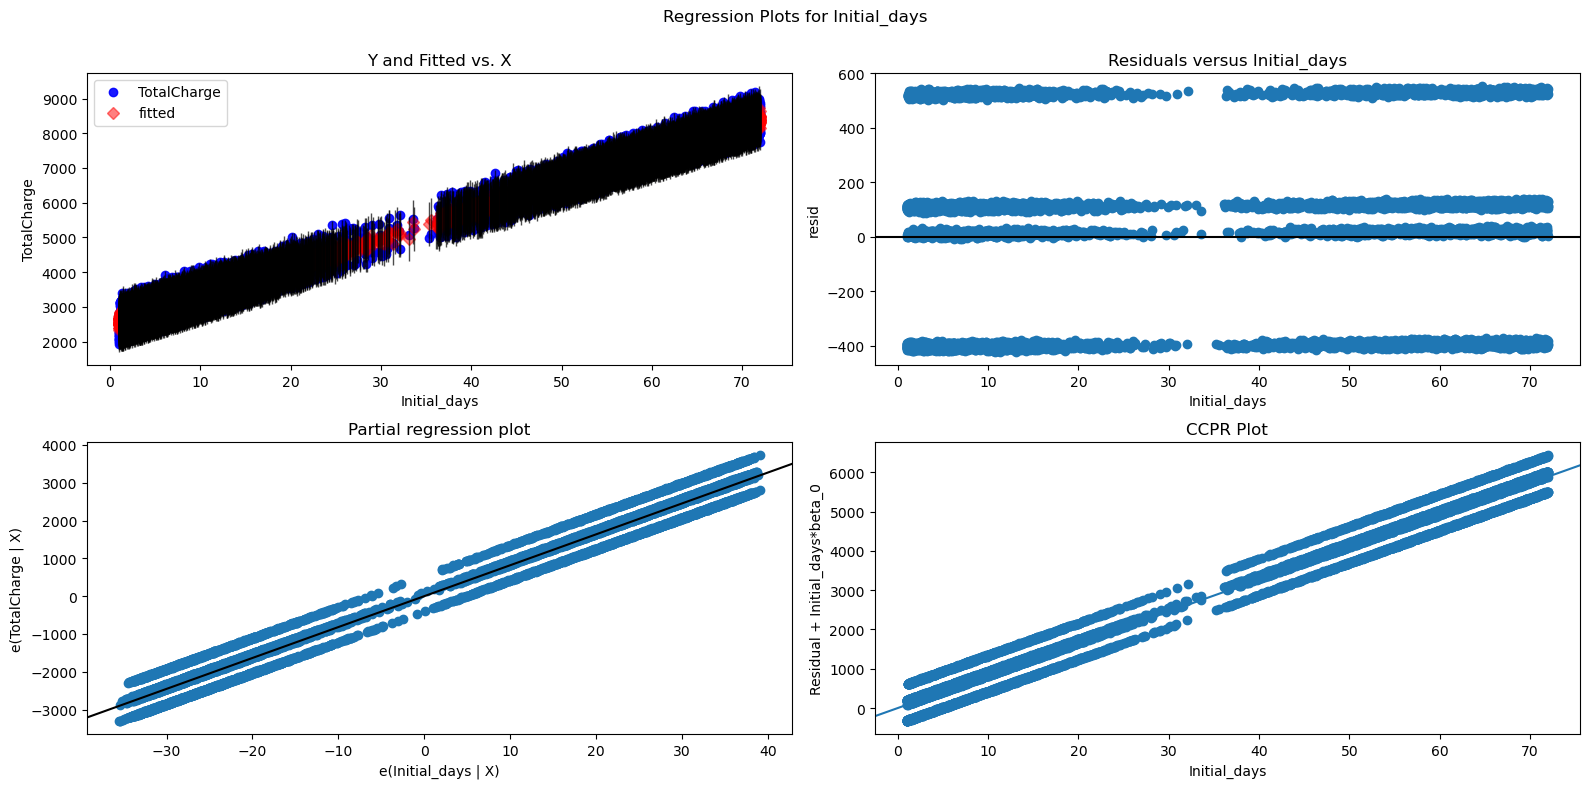

In [61]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Initial_days', fig=fig);

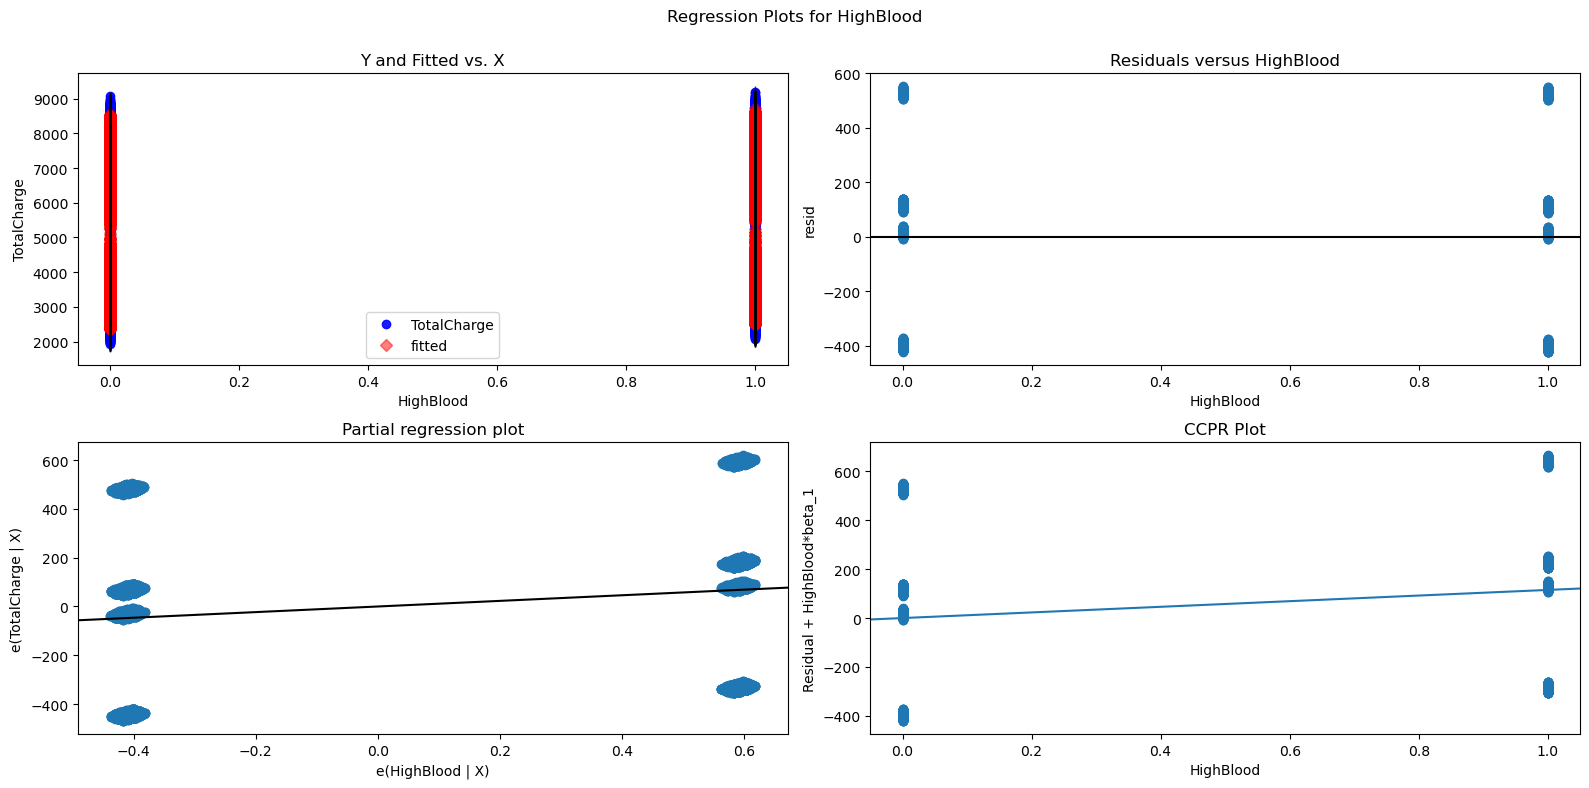

In [62]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'HighBlood', fig=fig);

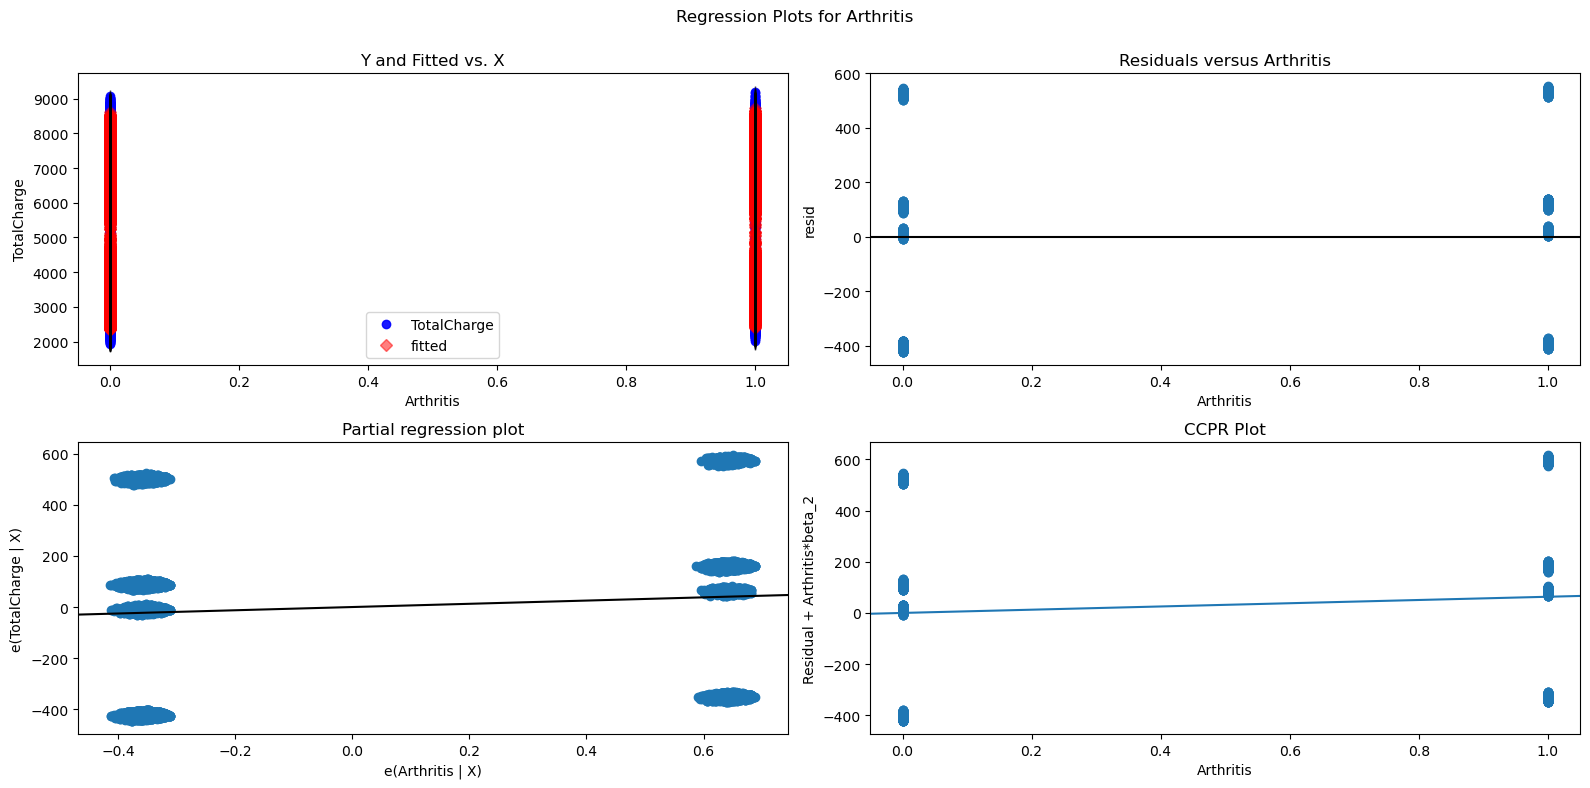

In [63]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Arthritis', fig=fig);

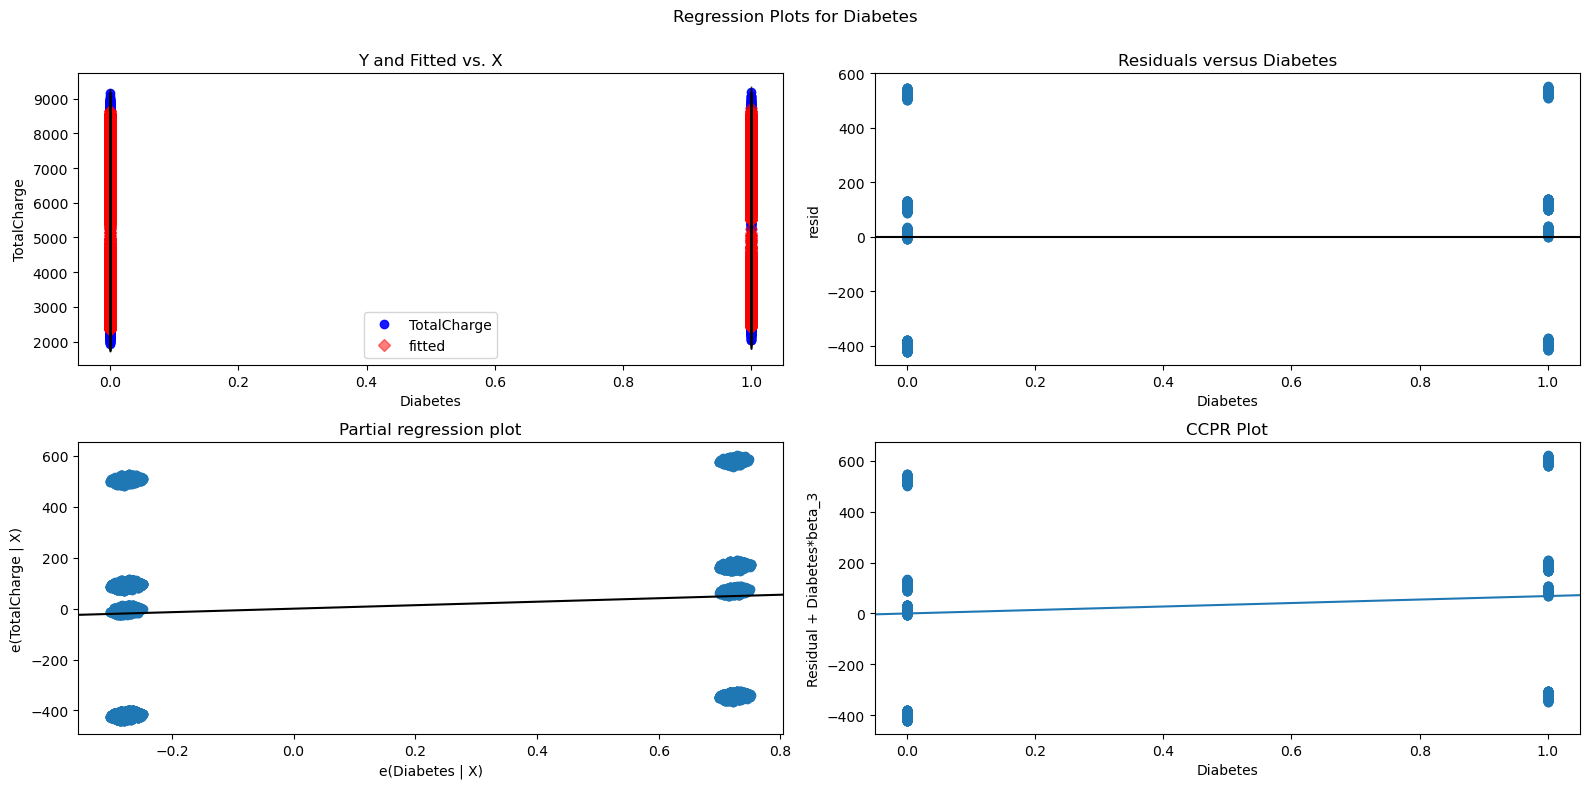

In [64]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Diabetes', fig=fig);

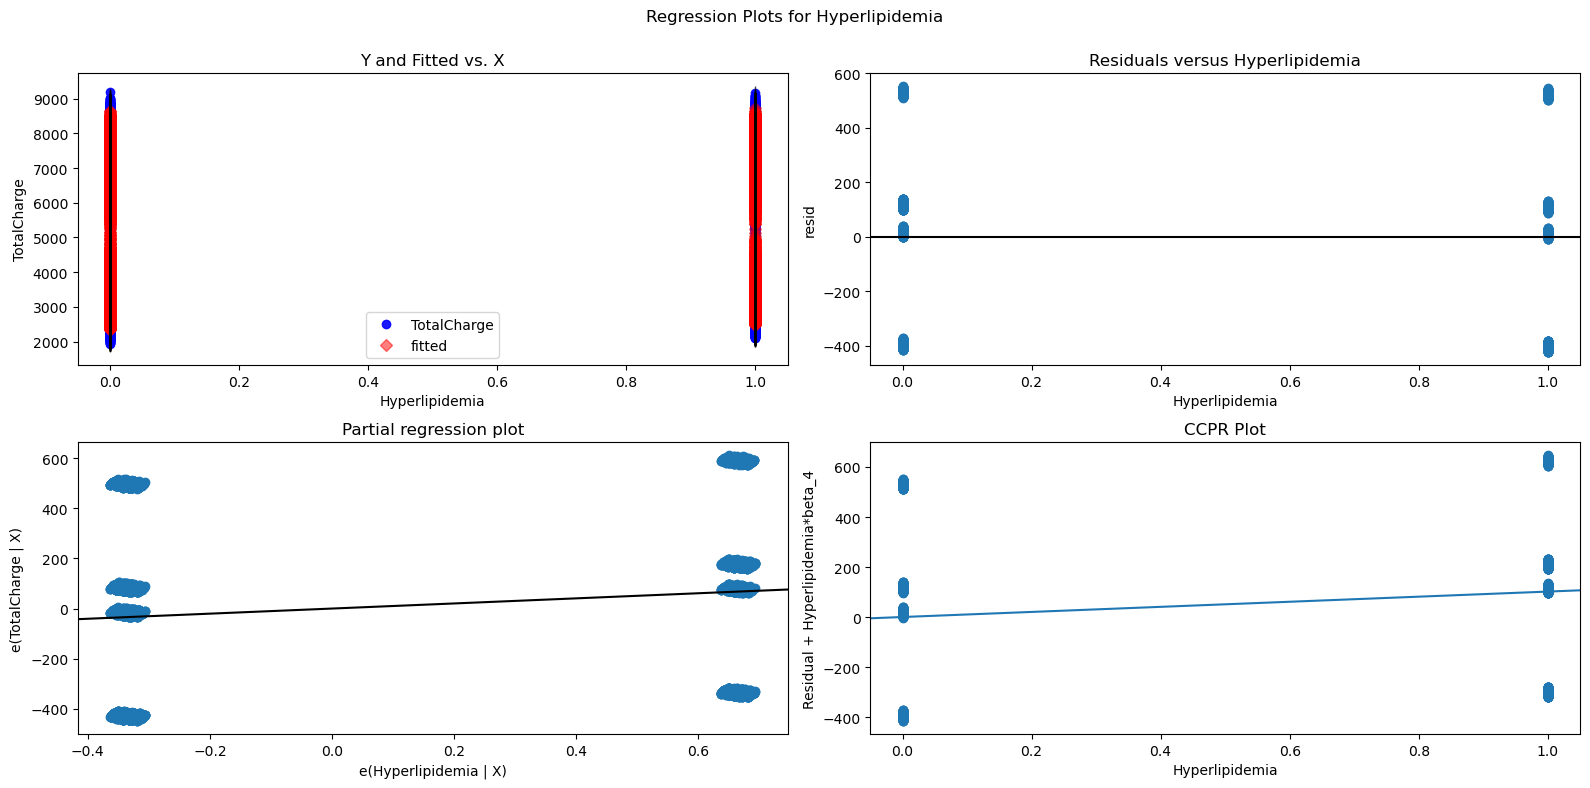

In [65]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Hyperlipidemia', fig=fig);

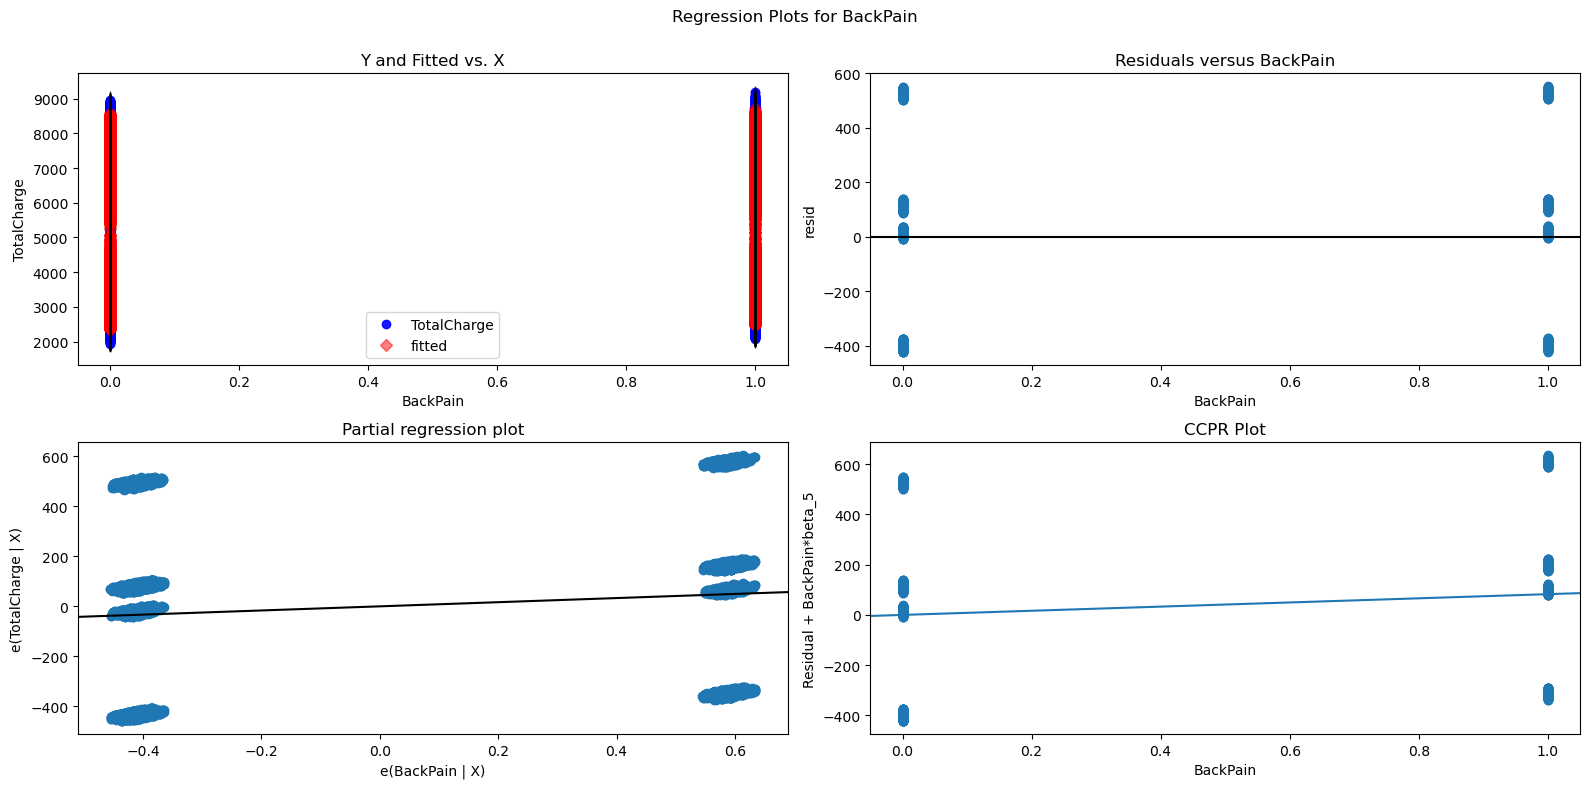

In [66]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'BackPain', fig=fig);

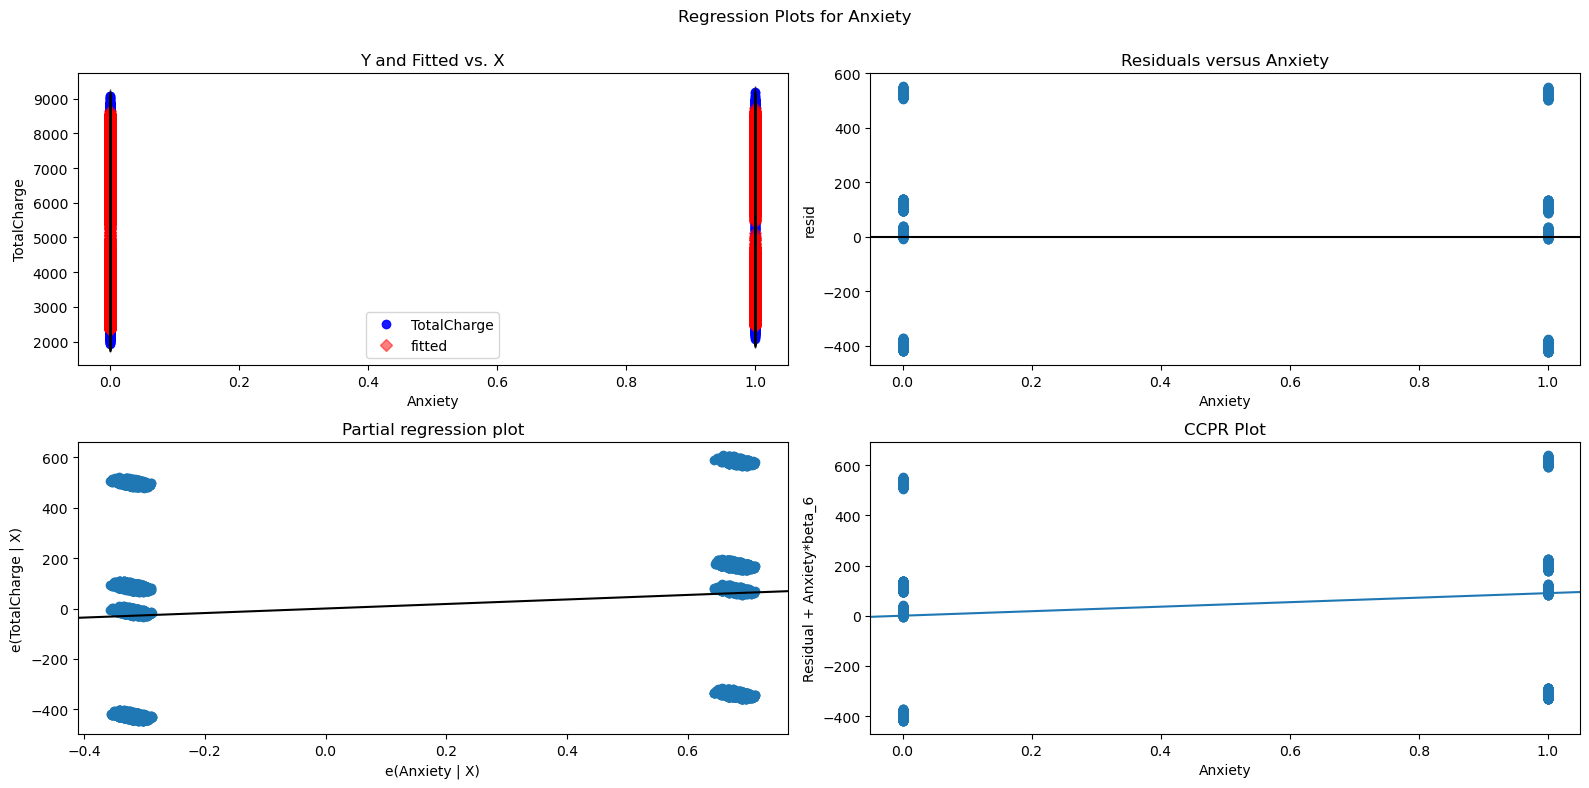

In [67]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Anxiety', fig=fig);

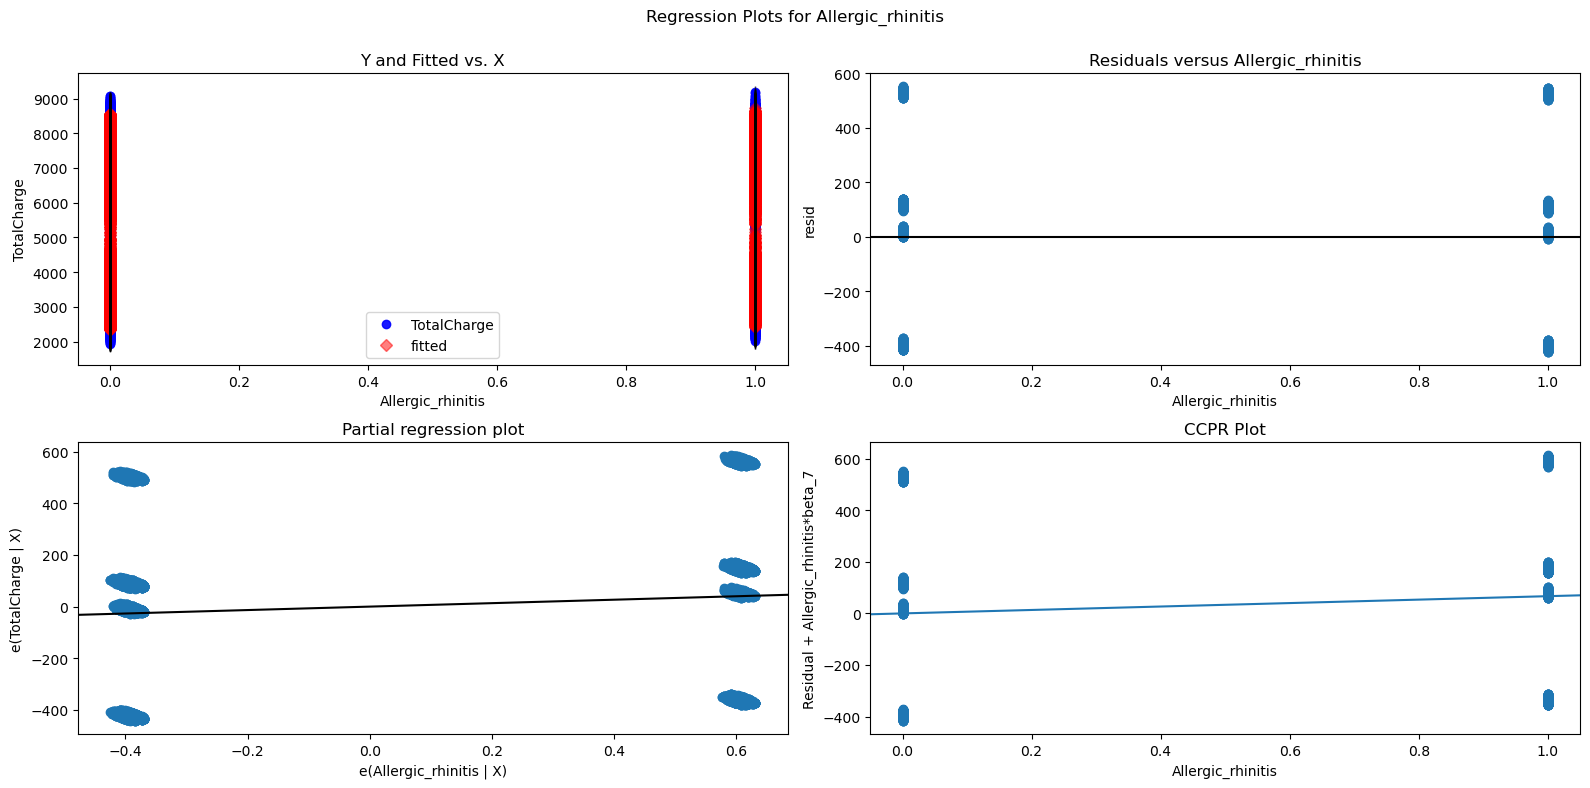

In [68]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Allergic_rhinitis', fig=fig);

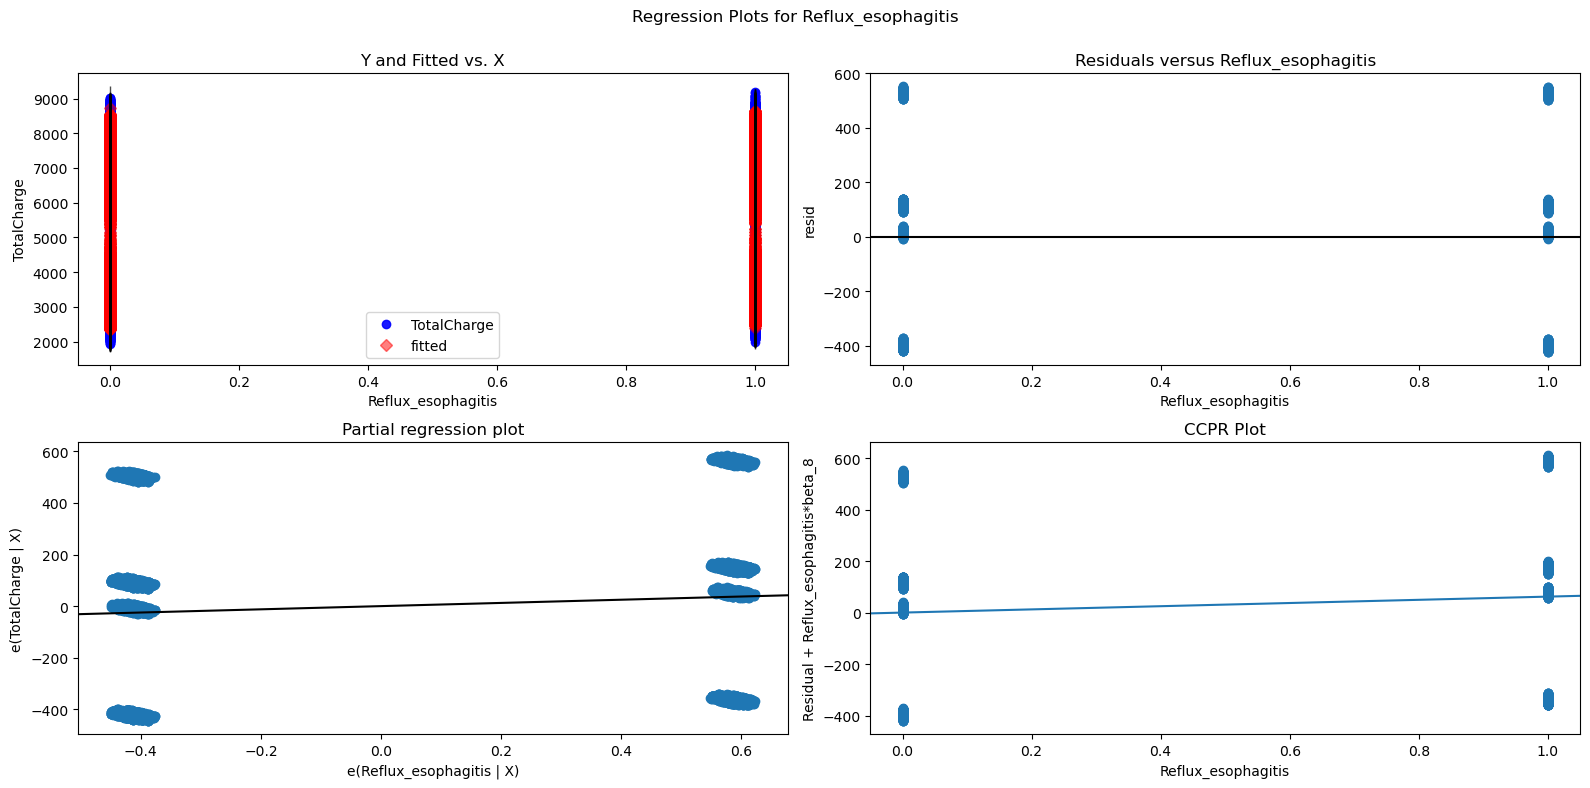

In [69]:
fig=plt.figure(figsize=[16,8])
sm.graphics.plot_regress_exog(m_results, 'Reflux_esophagitis', fig=fig);